# Ciência dos Dados - Projeto 1


## Introdução 

Esse trabalho tem como objetivo a aprendizagem de analisar dados através de ferramentas estatísticas e computacionais. Para atingi-lo, utilizamos três variáveis para ver a correlação entre elas. A principal é o Índice de Desenvolvimento Humano (IDH), que é composto por expectativa de vida, educação e o PIB per capita do país que está sendo analisado. Porém, nesse trabalho foram analisados diversos países em um determinado período, nesse caso, o ano de 2009. Formulamos uma pergunta sobre o IDH com relação as outras duas variáveis escolhidas e a resposta para a mesma tem que ser encontrada nos dados analisados.

** Nome:** Gabriel Miras Floriano

**Pergunta:** Como uma elevada população urbana e um setor de serviços desenvolvido ﻿interferem no IDH?﻿

# IDH, População Urbana e Setor de Serviços
Foram coletados três dados do site https://www.gapminder.org/, sendo que um deles foi definido pelo professor e os outros dois foram de livre escolha dos alunos:

1. IDH (Índice de Desenvolvimento Humano)
2. População Urbana (% do total)
3. Setor de Serviços (% do PIB)

Nesses dataframes, as linhas representam os países e as colunas representam o ano.

Como os arquivos estão separados, será preciso juntá-los cruzando o país, restringindo a análise do ano 2009.

## Imports ##

In [141]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns

## Leitura dos arquivos

In [142]:
#Leitura dos arquivos em excel
hdi = pd.read_excel('Indicator_HDI.xlsx')
UP = pd.read_excel('UP.xlsx')
S = pd.read_excel('S.xlsx')

# IDH

É possível verificar que cada linha representa um país e as colunas representam o ano.

In [143]:
hdi= hdi.loc[:, ["HDI", 2009]]
hdi = hdi.rename(columns = {'HDI':'País', 2009:'IDH em 2009'})
hdi.head(11)

,País,IDH em 2009
0,Abkhazia,NaN
1,Afghanistan,0.387
2,Akrotiri and Dhekelia,NaN
3,Albania,0.734
4,Algeria,0.691
5,American Samoa,NaN
6,Andorra,NaN
7,Angola,0.481
8,Anguilla,NaN
9,Antigua and Barbuda,NaN


# População Urbana

É possível verificar que cada linha representa um país e as colunas representam o ano.

In [144]:
UP= UP.loc[:, ["Urban population (% of total)", '2009']]
UP = UP.rename(columns = {"Urban population (% of total)":'País', '2009':'População Urbana em 2009'})
UP.head(11)

,País,População Urbana em 2009
0,Abkhazia,NaN
1,Afghanistan,22.9676
2,Akrotiri and Dhekelia,NaN
3,Albania,51.2184
4,Algeria,70.9570
5,American Samoa,92.6390
6,Andorra,88.3126
7,Angola,57.4918
8,Anguilla,NaN
9,Antigua and Barbuda,30.0322


# Setor de Serviços

É possível verificar que cada linha representa um país e as colunas representam o ano.

In [145]:
S= S.loc[:, ["Services, etc., value added (% of GDP)", '2009']]
S = S.rename(columns = {'Services, etc., value added (% of GDP)':'País', '2009':'Setor de Serviços em 2009'})
S.head(11)

,País,Setor de Serviços em 2009
0,Afghanistan,47.607657
1,Albania,60.239255
2,Algeria,30.960967
3,American Samoa,NaN
4,Andorra,NaN
5,Angola,30.751248
6,Antigua and Barbuda,76.285758
7,Argentina,60.697484
8,Armenia,45.280450
9,Aruba,NaN


# Junção das tabelas

In [146]:
df = hdi.join(UP, how='inner', lsuffix='hdi', rsuffix='2009')
df.head(11)

,Paíshdi,IDH em 2009,País2009,População Urbana em 2009
0,Abkhazia,NaN,Abkhazia,NaN
1,Afghanistan,0.387,Afghanistan,22.9676
2,Akrotiri and Dhekelia,NaN,Akrotiri and Dhekelia,NaN
3,Albania,0.734,Albania,51.2184
4,Algeria,0.691,Algeria,70.9570
5,American Samoa,NaN,American Samoa,92.6390
6,Andorra,NaN,Andorra,88.3126
7,Angola,0.481,Angola,57.4918
8,Anguilla,NaN,Anguilla,NaN
9,Antigua and Barbuda,NaN,Antigua and Barbuda,30.0322


In [147]:
data = df.join(S, how="inner", lsuffix = ' ', rsuffix = ' ')
data.head(11)

,Paíshdi,IDH em 2009,País2009,População Urbana em 2009,País,Setor de Serviços em 2009
0,Abkhazia,NaN,Abkhazia,NaN,Afghanistan,47.607657
1,Afghanistan,0.387,Afghanistan,22.9676,Albania,60.239255
2,Akrotiri and Dhekelia,NaN,Akrotiri and Dhekelia,NaN,Algeria,30.960967
3,Albania,0.734,Albania,51.2184,American Samoa,NaN
4,Algeria,0.691,Algeria,70.9570,Andorra,NaN
5,American Samoa,NaN,American Samoa,92.6390,Angola,30.751248
6,Andorra,NaN,Andorra,88.3126,Antigua and Barbuda,76.285758
7,Angola,0.481,Angola,57.4918,Argentina,60.697484
8,Anguilla,NaN,Anguilla,NaN,Armenia,45.280450
9,Antigua and Barbuda,NaN,Antigua and Barbuda,30.0322,Aruba,NaN


In [148]:
writer = pd.ExcelWriter('Projeto1.xlsx')
data.to_excel(writer,'data')
writer.save()

# Gráficos
Está parte está designada para a amostragem dos dados em formato de gráficos para um melhor entendimento e uma melhor análise.

## IDH e População Urbana

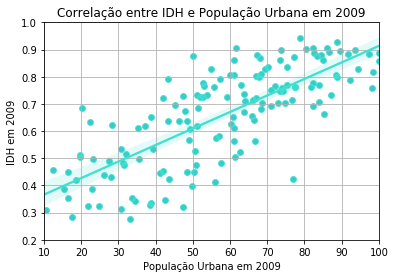

A correlação entre o IDH em 2009 e a população urbana em 2009 é: 0.7636087451596548


In [149]:
data.plot.scatter(x='População Urbana em 2009',y='IDH em 2009');
sns.regplot(data["População Urbana em 2009"],data["IDH em 2009"], color=('turquoise'))
plt.axis([10, 100, 0.2, 1])
plt.title("Correlação entre IDH e População Urbana em 2009")
plt.grid()
plt.show()
print('A correlação entre o IDH em 2009 e a população urbana em 2009 é:', data['IDH em 2009'].corr(data['População Urbana em 2009']))

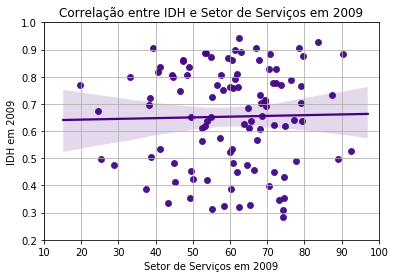

A correlação entre o IDH em 2009 e o setor de serviços em 2009 é: 0.021909223026682162


In [150]:
data.plot.scatter(x='Setor de Serviços em 2009',y='IDH em 2009');
sns.regplot(data["Setor de Serviços em 2009"],data["IDH em 2009"], color=('indigo'))
plt.axis([10, 100, 0.2, 1])
plt.title("Correlação entre IDH e Setor de Serviços em 2009")
plt.grid()
plt.show()
print('A correlação entre o IDH em 2009 e o setor de serviços em 2009 é:', data['IDH em 2009'].corr(data['Setor de Serviços em 2009']))

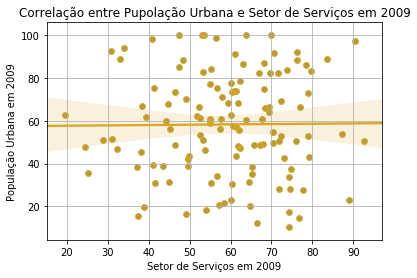

A correlação entre o setor de serviços em 2009 e a população Urbana em 2009  é: 0.009760147212070417


In [151]:
data.plot.scatter(x='Setor de Serviços em 2009',y='População Urbana em 2009');
sns.regplot(data["Setor de Serviços em 2009"],data["População Urbana em 2009"], color=('goldenrod'))
plt.title("Correlação entre Pupolação Urbana e Setor de Serviços em 2009")
plt.grid()
plt.show()
print('A correlação entre o setor de serviços em 2009 e a população Urbana em 2009  é:', data['Setor de Serviços em 2009'].corr(data['População Urbana em 2009']))

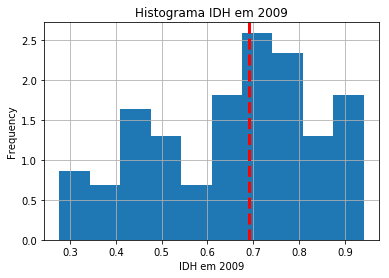

In [152]:
hdi["IDH em 2009"].plot.hist(density = True)
hdi["IDH em 2009"].describe()
plt.axvline(hdi['IDH em 2009'].median(), color= 'r', linestyle= 'dashed', linewidth= 3)
plt.title("Histograma IDH em 2009")
plt.xlabel("IDH em 2009")
plt.grid()
plt.show()

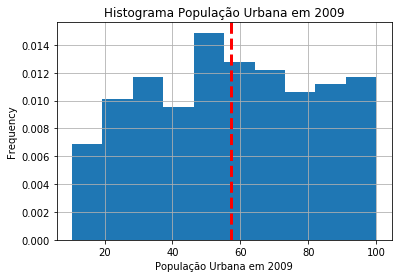

In [153]:
UP["População Urbana em 2009"].plot.hist(density = True)
UP["População Urbana em 2009"].describe()
plt.axvline(UP['População Urbana em 2009'].median(), color= 'r', linestyle= 'dashed', linewidth= 3)
plt.title("Histograma População Urbana em 2009")
plt.xlabel("População Urbana em 2009")
plt.grid()
plt.show()

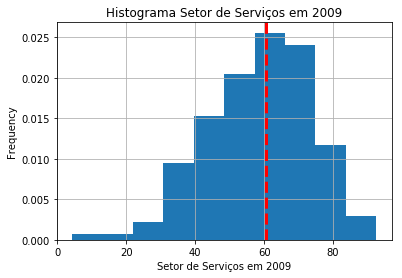

In [154]:
S["Setor de Serviços em 2009"].plot.hist(density = True)
S["Setor de Serviços em 2009"].describe()
plt.axvline(S['Setor de Serviços em 2009'].median(), color= 'r', linestyle= 'dashed', linewidth= 3)
plt.title("Histograma Setor de Serviços em 2009")
plt.xlabel("Setor de Serviços em 2009")
plt.grid()
plt.show()

# Conclusão

Com os dados analisados, pode-se dizer que  